# Real Estate Data Regression Prediction


## Introduction


In [191]:
#Load dataset
import pandas as pd
Housing_data=pd.read_csv('Housing_dataset_train.csv')

print(Housing_data.head())

# Set the 'ID' column as the index od the Dataset
Housing_data.set_index('ID', inplace=True)
df = pd.DataFrame(Housing_data)

#Understanding the structure of data
df.head(10)
df.shape
print(df.columns)

      ID      loc                 title  bedroom  bathroom  parking_space  \
0   3583  Katsina  Semi-detached duplex      2.0       2.0            1.0   
1   2748     Ondo             Apartment      NaN       2.0            4.0   
2   9261    Ekiti                   NaN      7.0       5.0            NaN   
3   2224  Anambra       Detached duplex      5.0       2.0            4.0   
4  10300     Kogi        Terrace duplex      NaN       5.0            6.0   

         price  
0  1149999.565  
1  1672416.689  
2  3364799.814  
3  2410306.756  
4  2600700.898  
Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')


## Data preprocessing

loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64


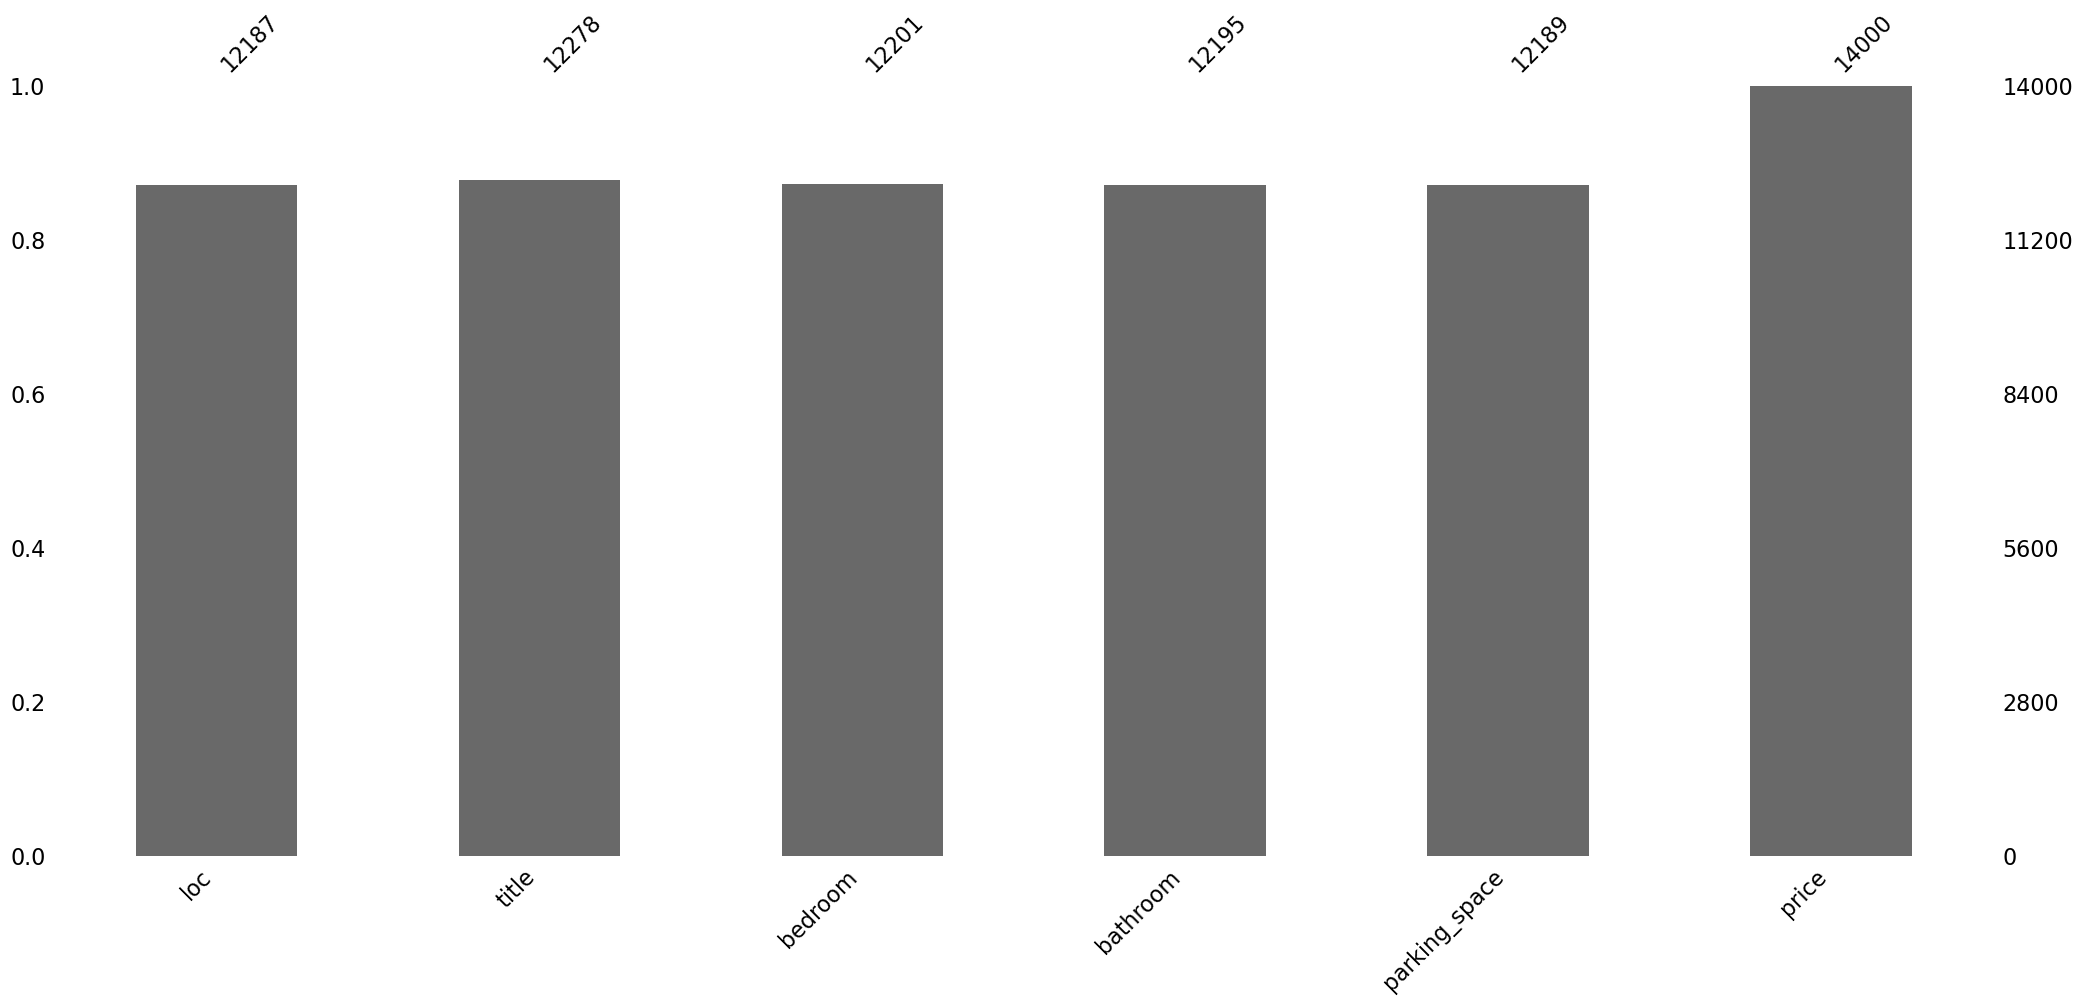

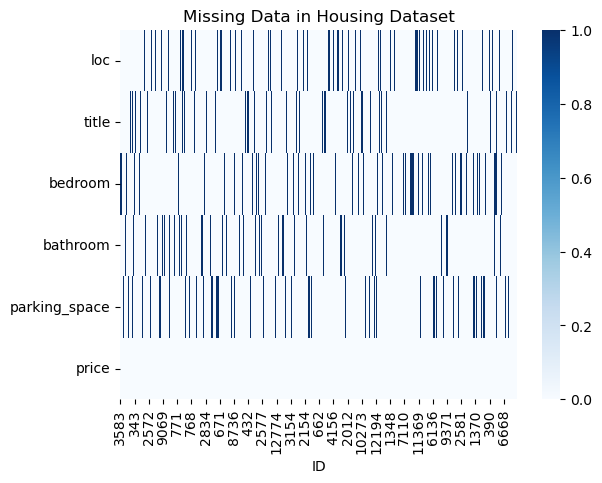

In [113]:
!pip install missingno
import missingno as mi
import matplotlib.pyplot as plt
import seaborn as sns
#Understand how many datapoints are missing
print(df.isna().sum())
#Visualize how many datapoints are nutnull
mi.bar(df)
plt.show()
sns.heatmap(df.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Housing Dataset")
plt.show()

# Remove all missing datasets as they consitute a small amount
clean_df=df.dropna()



## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlations by feature')

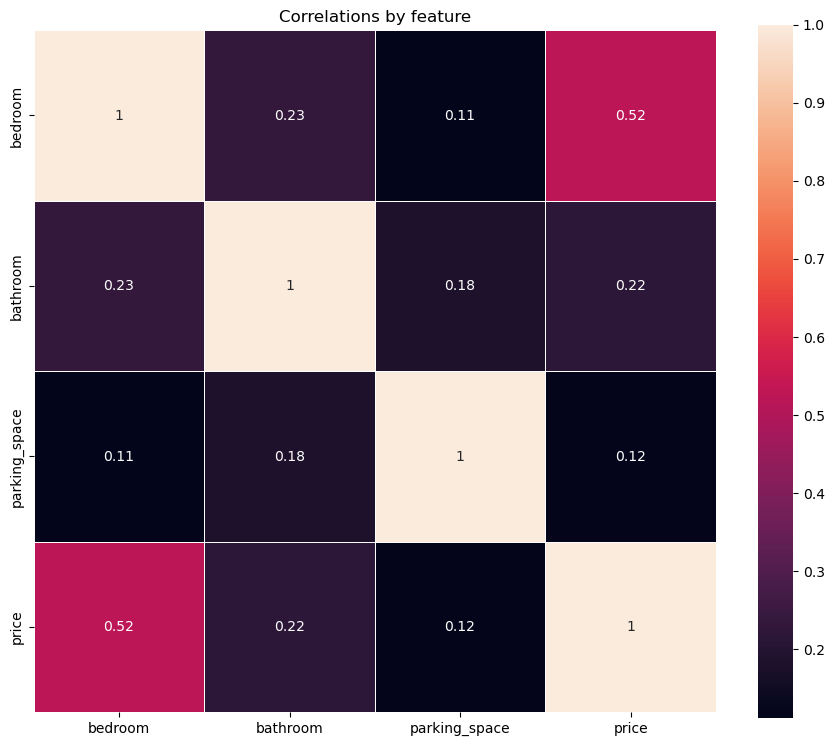

In [114]:
#plot data to understand the data segmentation by different columns
import matplotlib.pyplot as plt
import seaborn as sns
#Get data without states and title to identify relationship using heatmaps
Housing_data_nullstates=df.drop(columns=['loc','title'],).dropna()
corr = Housing_data_nullstates.corr()
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr,square=True, annot=True, linewidth=.5)
ax.set_title('Correlations by feature')
#The Heatmap shows there is little correlation between the datasets except for price and bedroom OF 0.5


In [115]:
Housing_data_nullstates.columns

Index(['bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

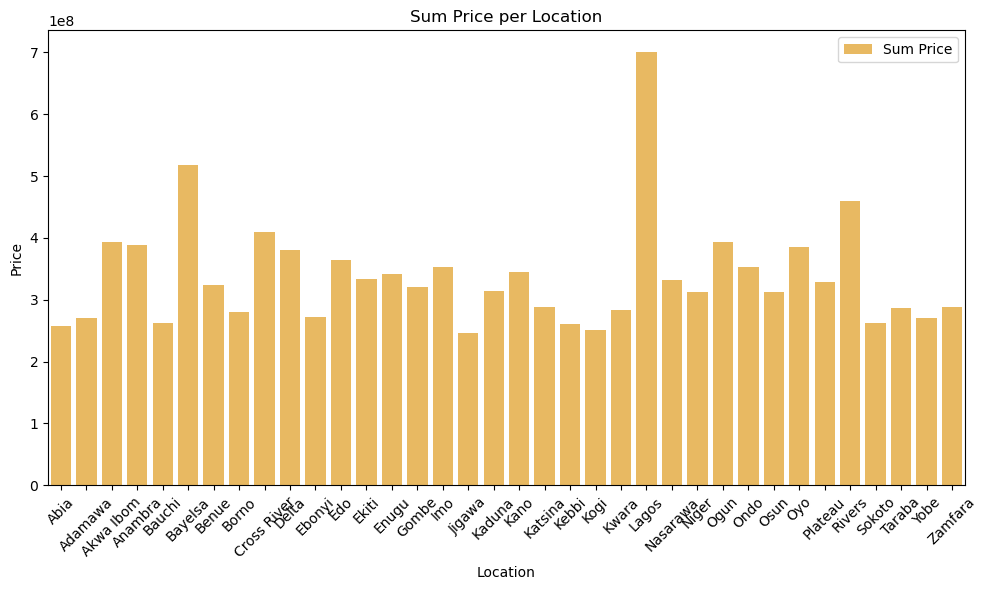

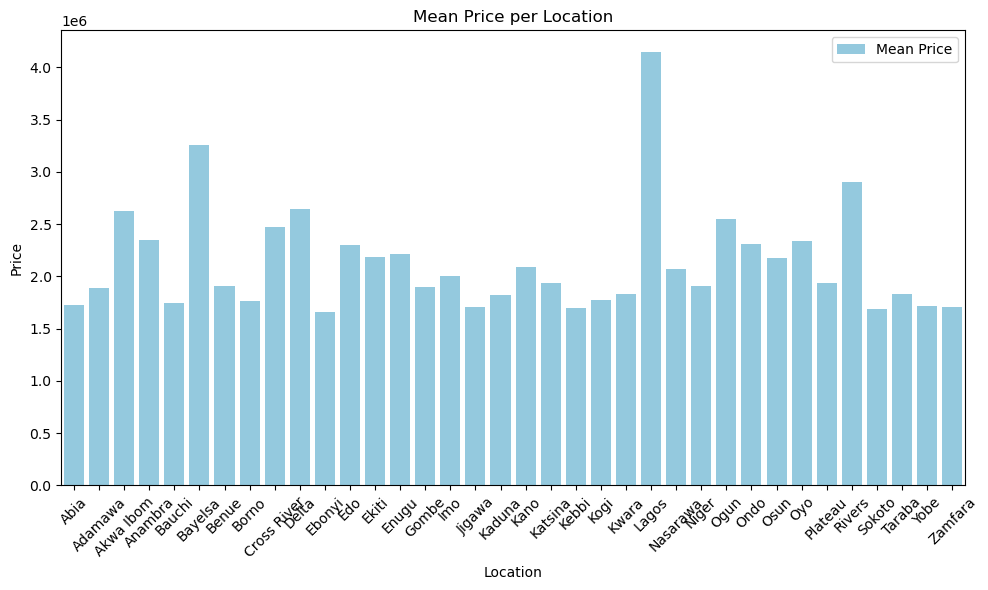

In [116]:
#Distribution of prices by Location
grouped_df_loc = clean_df.groupby('loc')['price'].mean()
sum_df_loc = clean_df.groupby('loc')['price'].sum()
# Convert the series to a DataFrame for easy plotting
plot_df = pd.DataFrame({'Mean Price': grouped_df_loc, 'Sum Price': sum_df_loc}).reset_index()
# Plot using Seaborn
plt.figure(figsize=(10, 6))

sns.barplot(x='loc', y='Sum Price', data=plot_df, color='orange', alpha=0.7, label='Sum Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Sum Price per Location')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

sns.barplot(x='loc', y='Mean Price', data=plot_df, color='skyblue', label='Mean Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Mean Price per Location')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The Data Shows that certain states have way higher prices, which as Lagos, Bauchi and Rivers




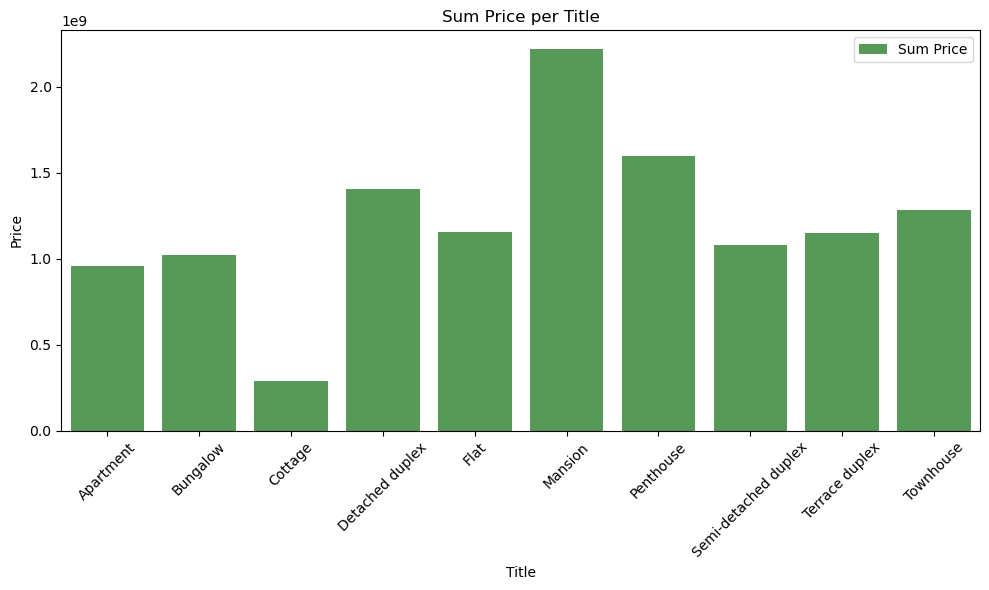

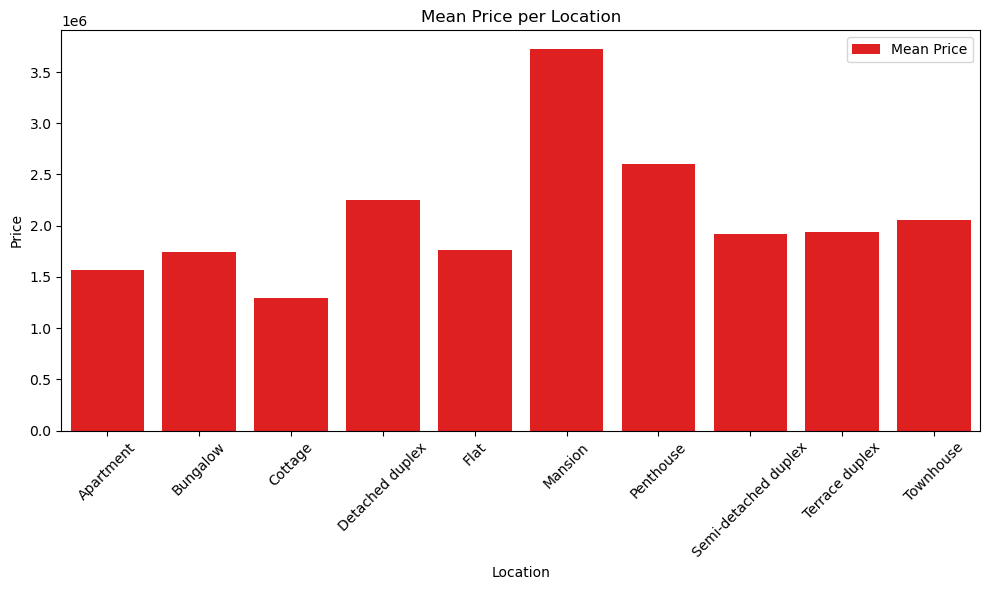

In [117]:
#Distribution of prices by Title
grouped_df_title = clean_df.groupby('title')['price'].mean()
sum_df_title = clean_df.groupby('title')['price'].sum()
# Convert the series to a DataFrame for easy plotting
plot_df = pd.DataFrame({'Mean Price': grouped_df_title, 'Sum Price': sum_df_title}).reset_index()
# Plot using Seaborn
plt.figure(figsize=(10, 6))

sns.barplot(x='title', y='Sum Price', data=plot_df, color='green', alpha=0.7, label='Sum Price')
plt.xlabel('Title')
plt.ylabel('Price')
plt.title('Sum Price per Title')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

sns.barplot(x='title', y='Mean Price', data=plot_df, color='red', label='Mean Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Mean Price per Location')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The Data Shows that certain states have way higher prices, which as Lagos, Bauchi and Rivers




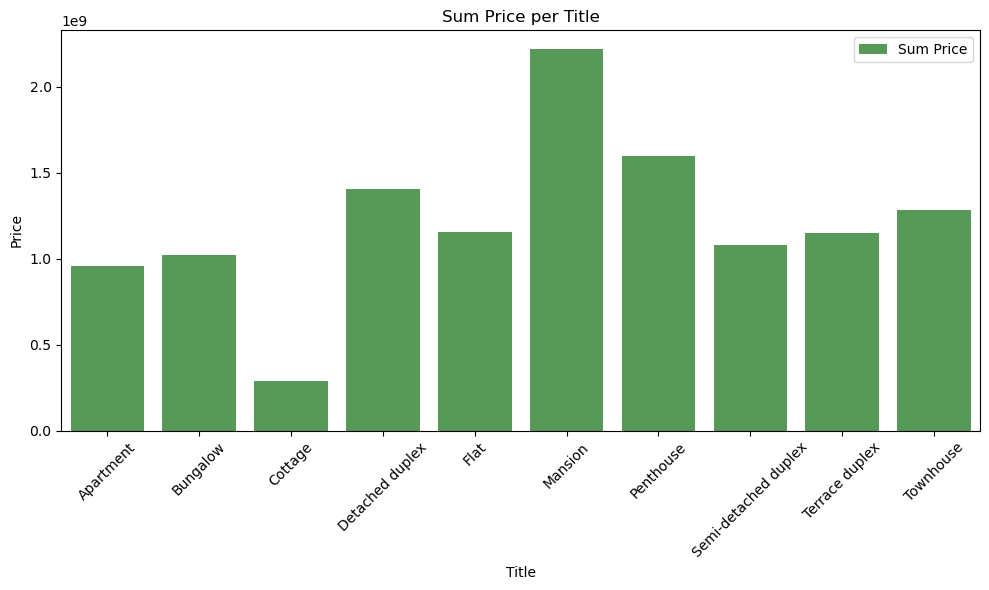

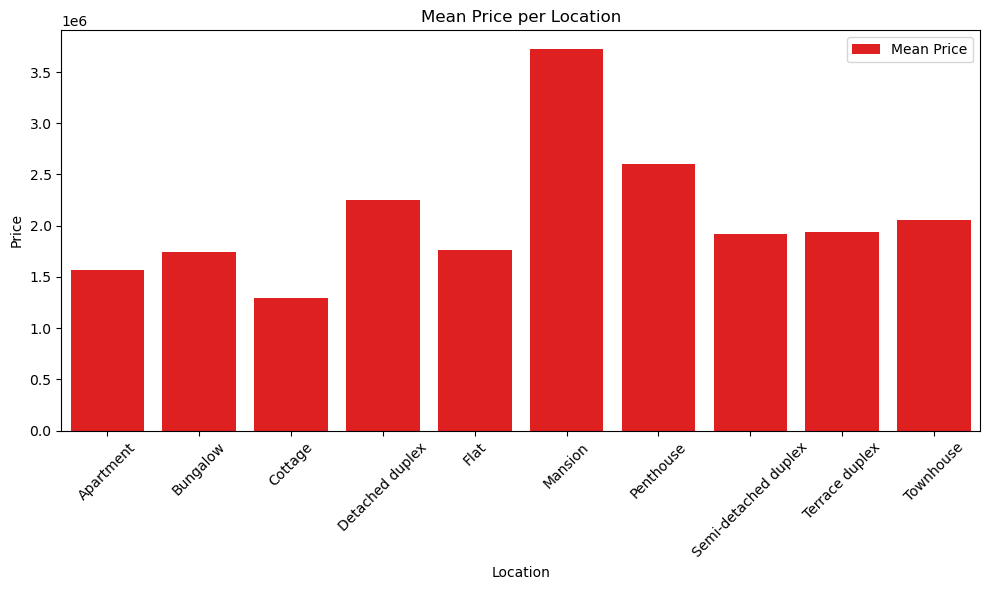

In [123]:
#Distribution of prices by Title
grouped_df_title = clean_df.groupby('title')['price'].mean()
sum_df_title = clean_df.groupby('title')['price'].sum()
# Convert the series to a DataFrame for easy plotting
plot_df = pd.DataFrame({'Mean Price': grouped_df_title, 'Sum Price': sum_df_title}).reset_index()
# Plot using Seaborn
plt.figure(figsize=(10, 6))

sns.barplot(x='title', y='Sum Price', data=plot_df, color='green', alpha=0.7, label='Sum Price')
plt.xlabel('Title')
plt.ylabel('Price')
plt.title('Sum Price per Title')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

sns.barplot(x='title', y='Mean Price', data=plot_df, color='red', label='Mean Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Mean Price per Location')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The Data Shows that certain states have way higher prices, which as Lagos, Bauchi and Rivers

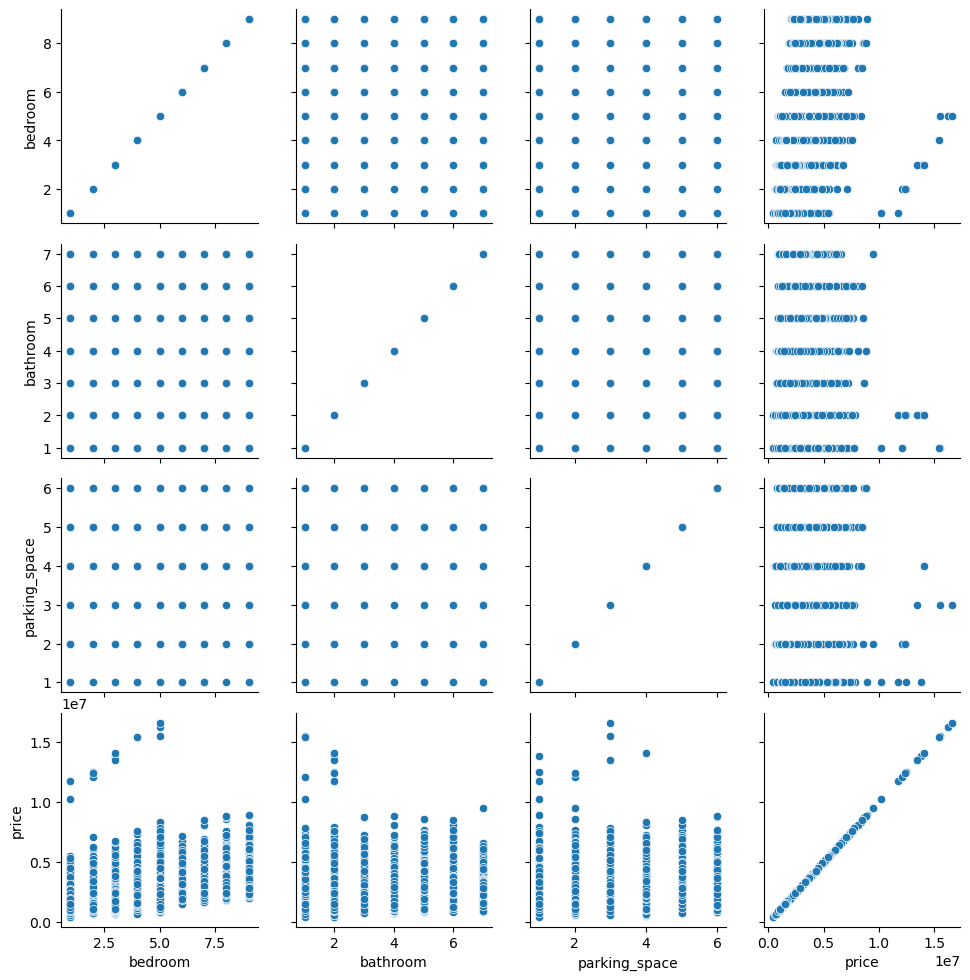

In [124]:
#More Exploratory datasets using PairGrid
import seaborn as sns
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [135]:
import numpy as np
#Remove upper outliers as most of the data are around a certain region

def remove_outliers_iqr(clean_df, columns, k=1.5):
    q1 = clean_df[columns].quantile(0.75)
    q3 = clean_df[columns].quantile(1)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return clean_df[~((clean_df[columns] < lower_bound) | (clean_df[columns] > upper_bound)).any(axis=1)]

# Example usage
# Assuming 'your_dataset' is your Pandas DataFrame with the columns to be processed for outlier removal
columns_to_remove_outliers = ['bedroom', 'bathroom', 'parking_space','price']
clean_df_outliers = remove_outliers_iqr(clean_df, columns_to_remove_outliers)

Housing_features=clean_df_outliers.drop(columns=['price'])
Housing_price=clean_df_outliers['price']
print(Housing_features.head())
print(Housing_price.head())
X=Housing_features
y=Housing_price


print(X.head())

          loc                 title  bedroom  bathroom  parking_space
ID                                                                   
3583  Katsina  Semi-detached duplex      2.0       2.0            1.0
2224  Anambra       Detached duplex      5.0       2.0            4.0
3003  Katsina             Penthouse      3.0       3.0            5.0
2624  Bayelsa             Apartment      3.0       4.0            2.0
3897     Abia        Terrace duplex      3.0       3.0            3.0
ID
3583    1149999.565
2224    2410306.756
3003    2043107.592
2624    1891772.069
3897    1293794.285
Name: price, dtype: float64
          loc                 title  bedroom  bathroom  parking_space
ID                                                                   
3583  Katsina  Semi-detached duplex      2.0       2.0            1.0
2224  Anambra       Detached duplex      5.0       2.0            4.0
3003  Katsina             Penthouse      3.0       3.0            5.0
2624  Bayelsa             Apa

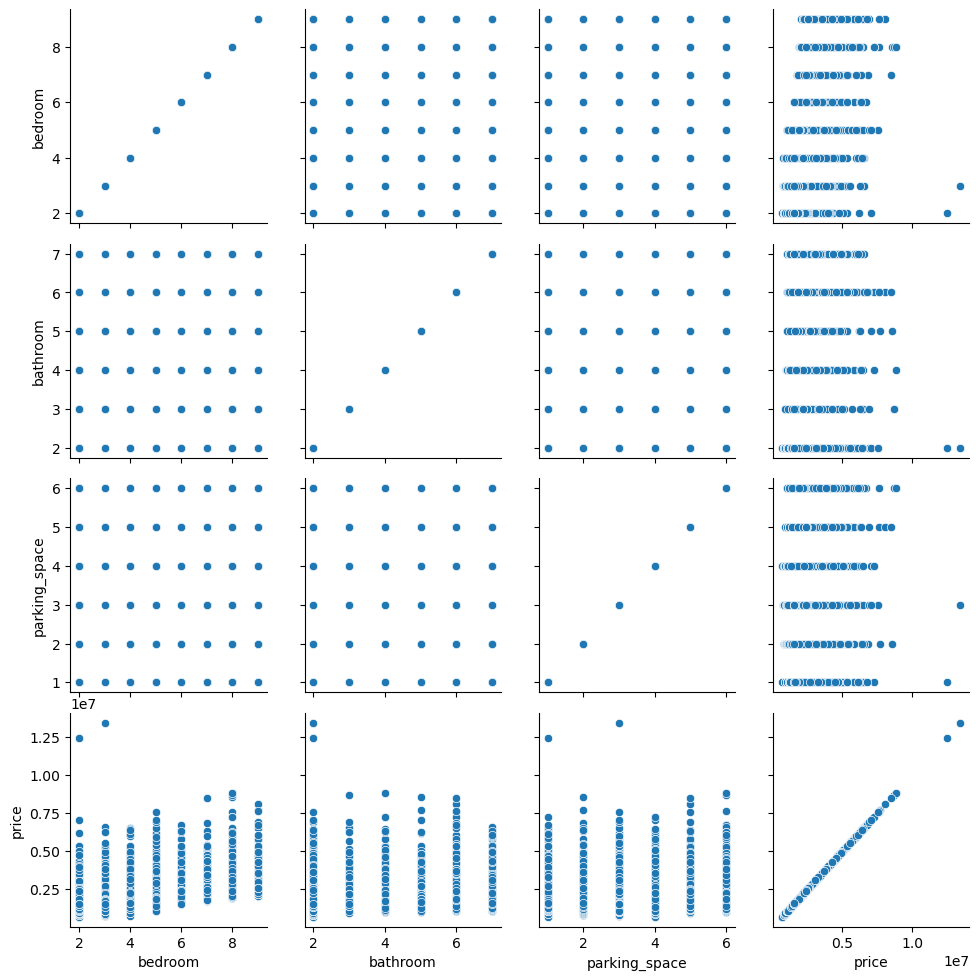

In [136]:
import seaborn as sns
g = sns.PairGrid(clean_df_outliers)
g.map(sns.scatterplot)

## Feature Selection

In [192]:
one_hot_encoded_data = pd.get_dummies(clean_df_outliers, columns = ['loc','title'])
one_hot_encoded_data=one_hot_encoded_data.dropna()
print(one_hot_encoded_data.head())
X=one_hot_encoded_data.drop(columns=['price'])
y=one_hot_encoded_data['price']

#from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded your clean_df

# Create a new DataFrame to avoid modifying the original data
#label_encoded_df = clean_df.copy()

# Apply label encoding for 'loc' and 'title' columns
#label_encoder = LabelEncoder()
#label_encoded_df['loc'] = label_encoder.fit_transform(label_encoded_df['loc'])
#label_encoded_df['title'] = label_encoder.fit_transform(label_encoded_df['title'])

# Drop rows with missing values, if any
#label_encoded_df = label_encoded_df.dropna()

# Separate features (X) and target (y)
#X = label_encoded_df.drop(columns=['price'])
#y = label_encoded_df['price']

#print(label_encoded_df.head())

      bedroom  bathroom  parking_space        price  loc_Abia  loc_Adamawa  \
ID                                                                           
3583      2.0       2.0            1.0  1149999.565         0            0   
2224      5.0       2.0            4.0  2410306.756         0            0   
3003      3.0       3.0            5.0  2043107.592         0            0   
2624      3.0       4.0            2.0  1891772.069         0            0   
3897      3.0       3.0            3.0  1293794.285         1            0   

      loc_Akwa Ibom  loc_Anambra  loc_Bauchi  loc_Bayelsa  ...  \
ID                                                         ...   
3583              0            0           0            0  ...   
2224              0            1           0            0  ...   
3003              0            0           0            0  ...   
2624              0            0           0            1  ...   
3897              0            0           0            0

## Model Selection

In [197]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [198]:
#Use Linear Regression for prediction
from sklearn.linear_model import LinearRegression
# Scikit-learn Linear Regression
sklearn_regressor = LinearRegression()
sklearn_regressor.fit(X_train, y_train)
y_pred_sklearn = sklearn_regressor.predict(X_test)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
r_squared = r2_score(y_test, y_pred_sklearn)
print("R-squared:", r_squared)
print(f"Scikit-learn Linear Regression MAE: {mae_sklearn:.4f}")
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
print(f"XGBoost Linear Regression RMSE: {rmse_sklearn:.4f}")


R-squared: 0.8836354066568659
Scikit-learn Linear Regression MAE: 163576.3131
XGBoost Linear Regression RMSE: 356078.5106


In [200]:
#Use Xgboost for prediction
import xgboost as xgb

# XGBoost Linear Regression
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost Linear Regression MAE: {mae_xgb:.4f}")
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost Linear Regression RMSE: {rmse_xgb:.4f}")
# Calculate R-squared
r_squared = r2_score(y_test, y_pred_xgb)
print("R-squared:", r_squared)


XGBoost Linear Regression MAE: 117230.3842
XGBoost Linear Regression RMSE: 259652.9922
R-squared: 0.9381248891391166


## Model Evaluation and Selection

Linear Regression MAE: 163576.3131, RMSE: 356078.5106, R-squared: 0.8836
Ridge Regression MAE: 161928.6646, RMSE: 355879.6699, R-squared: 0.8838


/Users/zayesosa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+13, tolerance: 2.759e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression MAE: 163567.0629, RMSE: 356077.2162, R-squared: 0.8836
Elastic Net Regression MAE: 535088.5461, RMSE: 808806.6592, R-squared: 0.3996
SVR MAE: 735334.4787, RMSE: 1062474.3603, R-squared: -0.0360
Decision Tree Regression MAE: 257080.0668, RMSE: 451299.2835, R-squared: 0.8131
Random Forest Regression MAE: 200815.7370, RMSE: 335799.0601, R-squared: 0.8965
Gradient Boosting Regression MAE: 191480.9540, RMSE: 305270.0393, R-squared: 0.9145


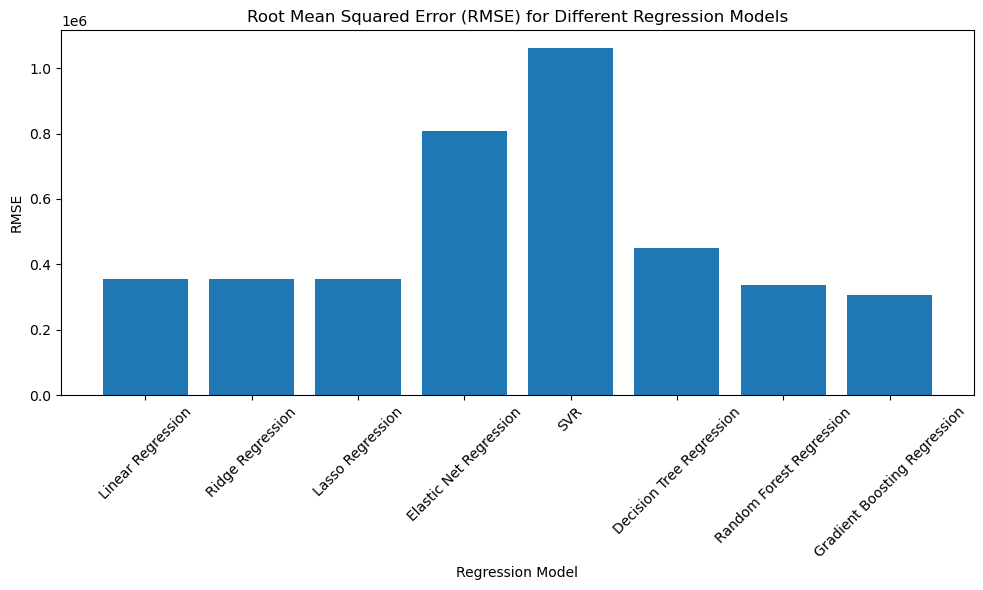

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Dictionaries to store the evaluation metrics
mae_scores = {}
rmse_scores = {}
r_squared_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    mae_scores[model_name] = mae
    rmse_scores[model_name] = rmse
    r_squared_scores[model_name] = r_squared

    print(f"{model_name} MAE: {mae:.4f}, RMSE: {rmse:.4f}, R-squared: {r_squared:.4f}")

# Plot RMSE for each model
plt.figure(figsize=(10, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Linear Regression Train MAE: 167088.2736, Test MAE: 163576.3131
Linear Regression Train RMSE: 352555.5653, Test RMSE: 356078.5106
Linear Regression Train R-squared: 0.8905, Test R-squared: 0.8836

Ridge Regression Train MAE: 165623.7309, Test MAE: 161928.6646
Ridge Regression Train RMSE: 352653.3320, Test RMSE: 355879.6699
Ridge Regression Train R-squared: 0.8905, Test R-squared: 0.8838



/Users/zayesosa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+13, tolerance: 2.759e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Train MAE: 167080.7362, Test MAE: 163567.0629
Lasso Regression Train RMSE: 352555.5375, Test RMSE: 356077.2162
Lasso Regression Train R-squared: 0.8905, Test R-squared: 0.8836

Elastic Net Regression Train MAE: 542084.5421, Test MAE: 535088.5461
Elastic Net Regression Train RMSE: 819826.7675, Test RMSE: 808806.6592
Elastic Net Regression Train R-squared: 0.4080, Test R-squared: 0.3996

SVR Train MAE: 742833.6702, Test MAE: 735334.4787
SVR Train RMSE: 1086976.2436, Test RMSE: 1062474.3603
SVR Train R-squared: -0.0407, Test R-squared: -0.0360

Decision Tree Regression Train MAE: 3506.9405, Test MAE: 262873.0585
Decision Tree Regression Train RMSE: 42449.6110, Test RMSE: 457916.1151
Decision Tree Regression Train R-squared: 0.9984, Test R-squared: 0.8076

Random Forest Regression Train MAE: 78308.9834, Test MAE: 198039.8630
Random Forest Regression Train RMSE: 150311.8135, Test RMSE: 329174.1033
Random Forest Regression Train R-squared: 0.9801, Test R-squared: 0.9006

Gra

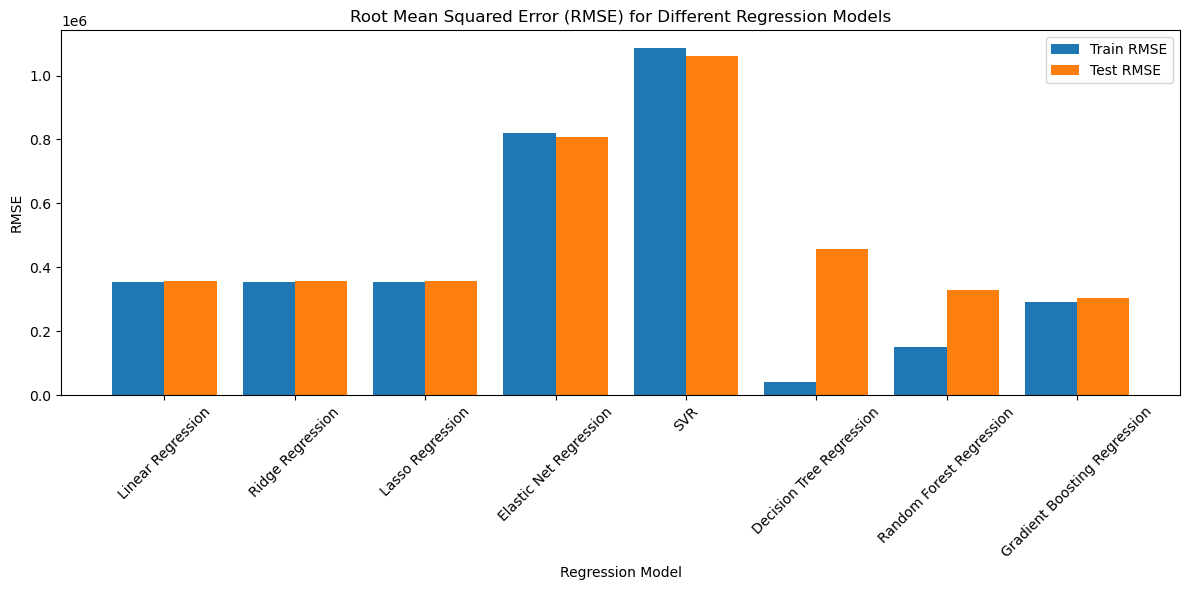

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Dictionaries to store the evaluation metrics
mae_train_scores = {}
mae_test_scores = {}
rmse_train_scores = {}
rmse_test_scores = {}
r_squared_train_scores = {}
r_squared_test_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r_squared_train = r2_score(y_train, y_pred_train)
    r_squared_test = r2_score(y_test, y_pred_test)

    mae_train_scores[model_name] = mae_train
    mae_test_scores[model_name] = mae_test
    rmse_train_scores[model_name] = rmse_train
    rmse_test_scores[model_name] = rmse_test
    r_squared_train_scores[model_name] = r_squared_train
    r_squared_test_scores[model_name] = r_squared_test

    print(f"{model_name} Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
    print(f"{model_name} Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"{model_name} Train R-squared: {r_squared_train:.4f}, Test R-squared: {r_squared_test:.4f}")
    print()
model1=GradientBoostingRegressor()
model1.fit(X_train, y_train)
# Make predictions using the model
predicted_prices = model1.predict(X)
    

# Plot RMSE for each model on both train and test data
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(models)) - 0.2, rmse_train_scores.values(), width=0.4, label='Train RMSE')
plt.bar(np.arange(len(models)) + 0.2, rmse_test_scores.values(), width=0.4, label='Test RMSE')
plt.xticks(np.arange(len(models)), list(rmse_train_scores.keys()), rotation=45)
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Regression Models')
plt.legend()
plt.tight_layout()
plt.show()

model1=GradientBoostingRegressor()
model1.fit(X_train, y_train)
# Make predictions using the model
predicted_prices = model1.predict(X)


## Conclusion

### The most optimal suggestion entails employing Gradient Boosting regression, alongside one-hot encoding, and eliminating upper extreme outliers due to their substantial deviation from the dataset. The dataset exhibits disparate responses to various models. Notably, this model performs impressively in prediction, evident from its non-negative cross_val and commendably high R2 score. Nonetheless, deploying it would be unwise, as the RMSE of 305K naira presents an alarming risk of substantial financial losses for the company. Consequently, a comprehensive review and augmentation of the dataset with additional quantifiable data are imperative.

## Limitations and Reccomendations

### The poor correlation between the datasets and its target variable price. The datasets needs more breadth and data with stronger correlations. The use of deep learning techniques should also be adopted. Outliers for future datasets should also be carefully considered as some types of houses have outrageous prices

# Testing with the Housing Test dataset

In [219]:

#Load Test Dataset for Zindi submission
test_data = pd.read_csv('Housing_dataset_test.csv')

# Set the 'ID' column as the index od the Dataset
test_data.set_index('ID', inplace=True)

# Remove NaN values if any
test_data.dropna(inplace=True)

#Use One_Hot_encoded to rank the loc and title data
one_hot_encoded_test = pd.get_dummies(test_data, columns = ['loc','title'])

# Use the best algorithm to create the model for predicitons of test data
model1=GradientBoostingRegressor()
model1.fit(X_train, y_train)

# Make predictions using the model
predicted_prices = model1.predict(one_hot_encoded_test)

# Create a new DataFrame with columns "ID" and "price" using the predicted prices
result_df = pd.DataFrame({"ID": one_hot_encoded_test.index, "price": predicted_prices})

# Save the result DataFrame to a new CSV file
result_csv_path = "cyrerez.csv"
result_df.to_csv(result_csv_path, index=False)
